<a href="https://colab.research.google.com/github/mrsaurabhtanwer/assignment1/blob/main/online_advertising_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Problem Statement:</h2>
<p>You are provided with the marketing spend data of an online advertising firm who
are looking to optimize their cost spend on ads while increasing their yield in
terms of marketing goals.</p>
<h2>Objective:</h2>
<p>Analyze the data and find actionable insights in the given data, come up with
strategies that use Data Science and AI techniques to optimize their marketing
spends for maximum yield.</p>

#### Initialization

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Importing the data

In [31]:
df = pd.read_csv('/content/online_advertising_performance_data.csv')
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


#### Checking the null values and datatypes

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

#### Counting the null values

In [33]:
df.isna().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,413
displays,0
cost,0
clicks,0
revenue,0


#### From the above we see that we have 2 fields which are having all null values, hence we can remove those columns

In [34]:
df = df.drop(columns=['Unnamed: 12', 'Unnamed: 13'])

#### Making the null values in the placement column as empty string

In [35]:
df[df['placement'].isna()].head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
893,April,5,camp 1,High,728 x 90,NaN,8,0.0152,0,0.0,0,0.0
951,April,5,camp 2,Low,728 x 90,NaN,2,0.0016,0,0.0,0,0.0
957,April,5,camp 2,Medium,728 x 90,NaN,4,0.0076,0,0.0,0,0.0
1034,April,5,camp 3,Medium,728 x 90,NaN,1,0.0008,0,0.0,0,0.0
1042,April,6,camp 1,High,160 x 600,NaN,1,0.0006,0,0.0,0,0.0


In [36]:
df['placement'] = df['placement'].fillna('')

#### Re checking the null values

In [37]:
df.isna().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,0
displays,0
cost,0
clicks,0
revenue,0


#### Displaying the unique values in the object datatype columns

In [38]:
df['placement'].unique()

array(['abc', 'def', 'ghi', 'mno', 'jkl', ''], dtype=object)

In [39]:
df['month'].unique()

array(['April', 'May', 'June'], dtype=object)

In [40]:
df['campaign_number'].unique()

array(['camp 1', 'camp 2', 'camp 3'], dtype=object)

In [41]:
df['user_engagement'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [42]:
df['banner'].unique()

array(['160 x 600', '240 x 400', '300 x 250', '468 x 60', '580 x 400',
       '670 x 90', '728 x 90', '800 x 250'], dtype=object)

In [43]:
le = LabelEncoder()

#### Checking the values once again

In [44]:
df.head(100)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,April,1,camp 2,Medium,300 x 250,abc,11,0.0170,0,0.0000,0,0.0000
96,April,1,camp 2,Medium,300 x 250,def,35227,14.1625,401,15.7612,14,839.2774
97,April,1,camp 2,Medium,300 x 250,ghi,33570,20.8269,1426,56.0374,38,2771.7170
98,April,1,camp 2,Medium,300 x 250,jkl,2324,1.3180,19,0.7470,0,0.0000


#### Creating additional column to show the ROI - Cost cum Conversion Ratio

In [45]:
df['ROI'] = np.where(df['post_click_conversions'] > 0,
                     df['cost'] / df['post_click_conversions'],
                     0)
df[['ROI', 'cost', 'post_click_conversions']]

,ROI,cost,post_click_conversions
0,0.000000,0.0060,0
1,1.164452,26.7824,23
2,0.354236,27.6304,78
3,0.351499,216.8750,617
4,0.000000,0.0670,0
...,...,...,...
15403,0.000000,0.0249,0
15404,0.134800,0.4044,3
15405,0.000000,0.0157,0
15406,0.000000,0.0123,0


#### Top 5 Most Effective placement Investments

In [46]:
df_top5_bestinvestments = df.sort_values(by='ROI', ascending = False)[:5]
df_top5_bestinvestments

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,ROI
5177,April,25,camp 3,Medium,300 x 250,mno,120601,13.1724,472,25.1688,1,9.9715,13.1724
1249,April,6,camp 3,Medium,728 x 90,mno,151231,12.5544,416,21.2116,1,7.0110,12.5544
201,April,1,camp 3,Medium,728 x 90,mno,174462,12.3332,707,37.0550,1,136.5586,12.3332
821,April,4,camp 3,Medium,728 x 90,mno,162179,11.3176,470,24.3821,1,8.4299,11.3176
11852,June,6,camp 3,Medium,300 x 250,mno,139691,11.0075,441,23.6771,1,6.6843,11.0075


#### ROI By Placements

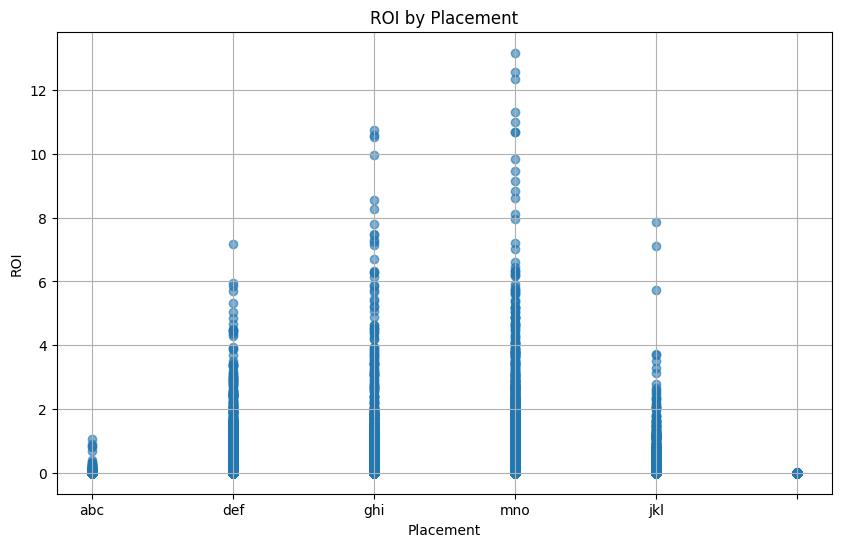

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df['placement'], df['ROI'], alpha=0.6)
plt.xlabel('Placement')
plt.ylabel('ROI')
plt.title('ROI by Placement')
plt.grid(True)
plt.show()

#### Post Click Coversion based on the User Engagement

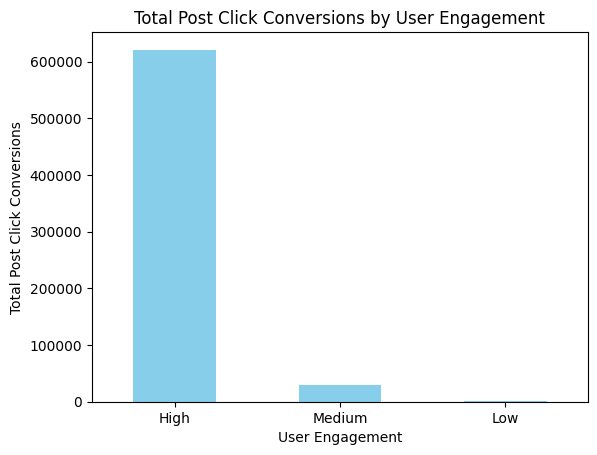

In [48]:
user_engagement_conversions = df.groupby('user_engagement')['post_click_conversions'].sum().sort_values(ascending=False)

user_engagement_conversions.plot(kind='bar', color='skyblue')
plt.xlabel('User Engagement')
plt.ylabel('Total Post Click Conversions')
plt.title('Total Post Click Conversions by User Engagement')
plt.xticks(rotation=0)
plt.show()

#### Plotting the total marketing cost over time

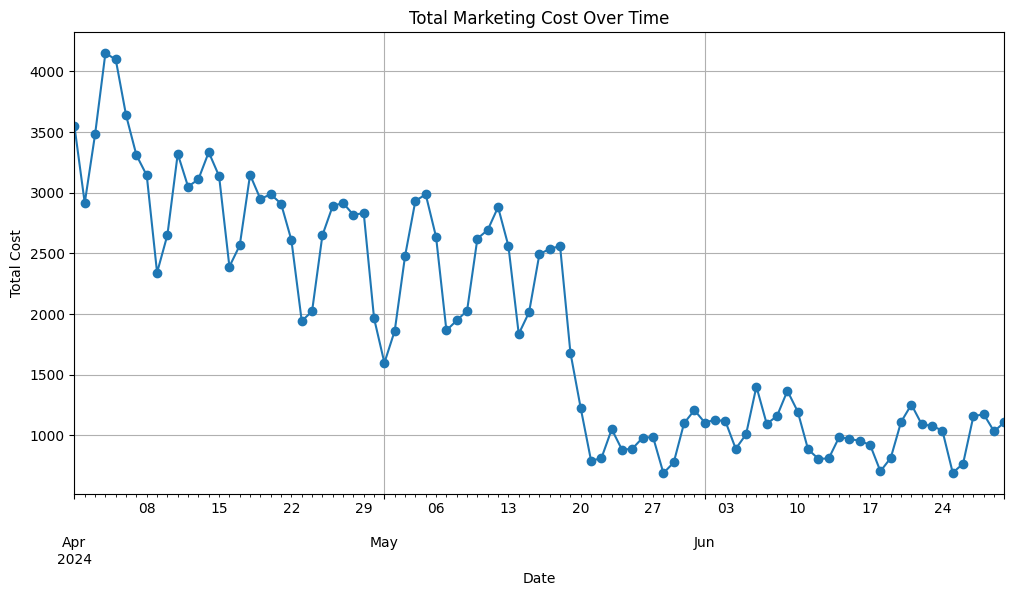

In [49]:
# Convert 'month' and 'day' to a datetime column for time-based analysis
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' 2024')

# Example: Plot total cost over time
df.groupby('date')['cost'].sum().plot(figsize=(12,6), marker='o')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.title('Total Marketing Cost Over Time')
plt.grid(True)
plt.show()

From the above diagram, we see that the total marketing cost has reduced over time

#### Successful Campaign based on the ROI

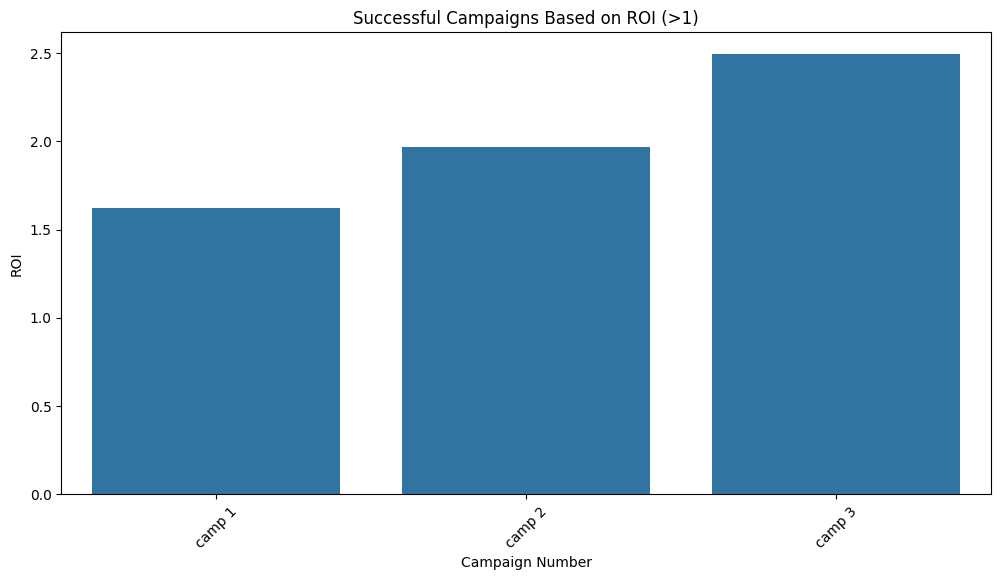

In [50]:
# Define a threshold for a "successful" campaign, e.g., ROI > 1
successful_campaigns = df[df['ROI'] > 1]

plt.figure(figsize=(12,6))
sns.barplot(data=successful_campaigns, x='campaign_number', y='ROI', ci=None)
plt.title('Successful Campaigns Based on ROI (>1)')
plt.xlabel('Campaign Number')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

##### Show how frequently the campigns were used

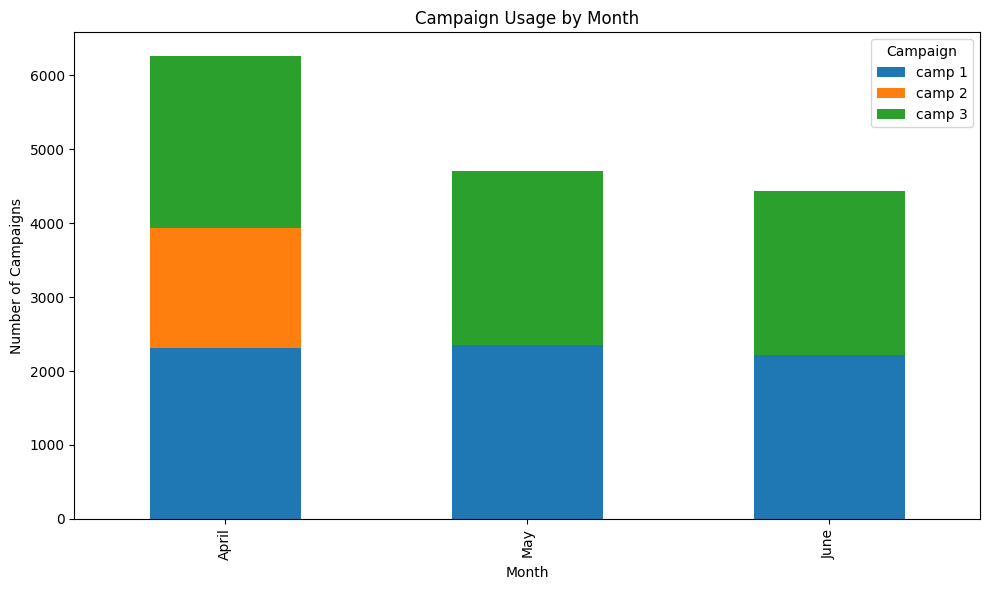

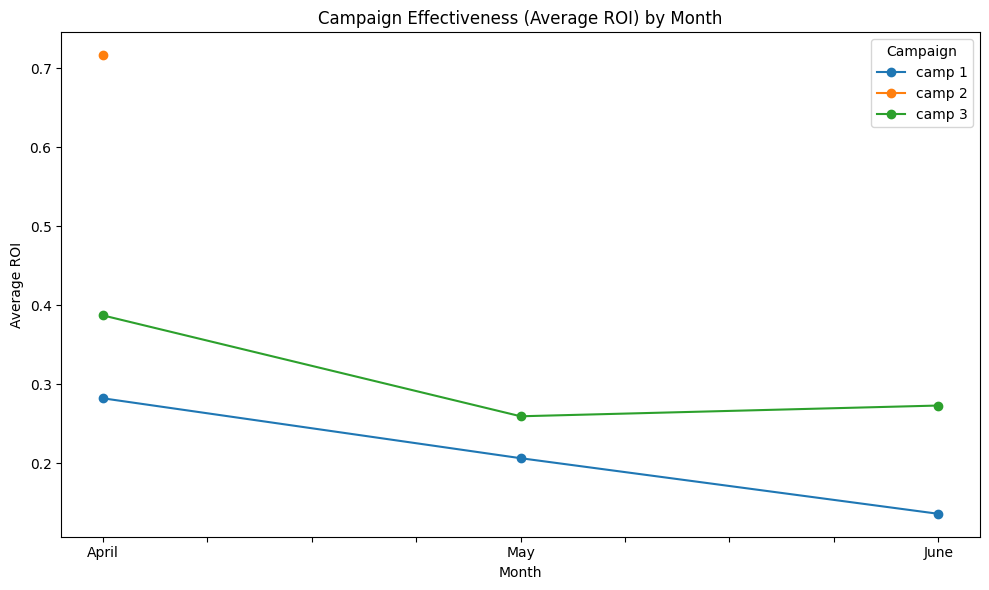

In [51]:
# Group by date and campaign_number to get total usage and average ROI per campaign per day
campaign_usage = df.groupby(['date', 'campaign_number']).agg(
    usage_count=('campaign_number', 'count'),
    avg_roi=('ROI', 'mean')
).reset_index()


# Extract month from the date for grouping
campaign_usage['month'] = campaign_usage['date'].dt.strftime('%B')

# Group by month and campaign_number
monthly_campaign_usage = campaign_usage.groupby(['month', 'campaign_number']).agg(
    usage_count=('usage_count', 'sum'),
    avg_roi=('avg_roi', 'mean')
).reset_index()

# Ensure months are in calendar order
month_order = ['April', 'May', 'June']
monthly_campaign_usage['month'] = pd.Categorical(monthly_campaign_usage['month'], categories=month_order, ordered=True)
monthly_campaign_usage = monthly_campaign_usage.sort_values('month')

# Pivot for stacked bar plot (usage)
usage_month_pivot = monthly_campaign_usage.pivot(index='month', columns='campaign_number', values='usage_count').fillna(0)

# Plot campaign usage by month
usage_month_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Number of Campaigns')
plt.title('Campaign Usage by Month')
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()

# Pivot for line plot (effectiveness)
roi_month_pivot = monthly_campaign_usage.pivot(index='month', columns='campaign_number', values='avg_roi')

# Plot average ROI per campaign by month
roi_month_pivot.plot(figsize=(10,6), marker='o')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title('Campaign Effectiveness (Average ROI) by Month')
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()

#### Initializing the Label Encoder

#### Converting all the object datatypes to labels using label encoding

In [52]:
for col in df.columns:
   if df[col].dtype == 'object':
       df[col] = le.fit_transform(df[col])

#### Apply the Standard Scaler on the dataset

In [53]:
sc = StandardScaler()

scaleddf = sc.fit_transform(df.drop(columns=['date']))

In [54]:
df.columns

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'ROI', 'date'],
      dtype='object')

#### Correlation matrix for numerical features

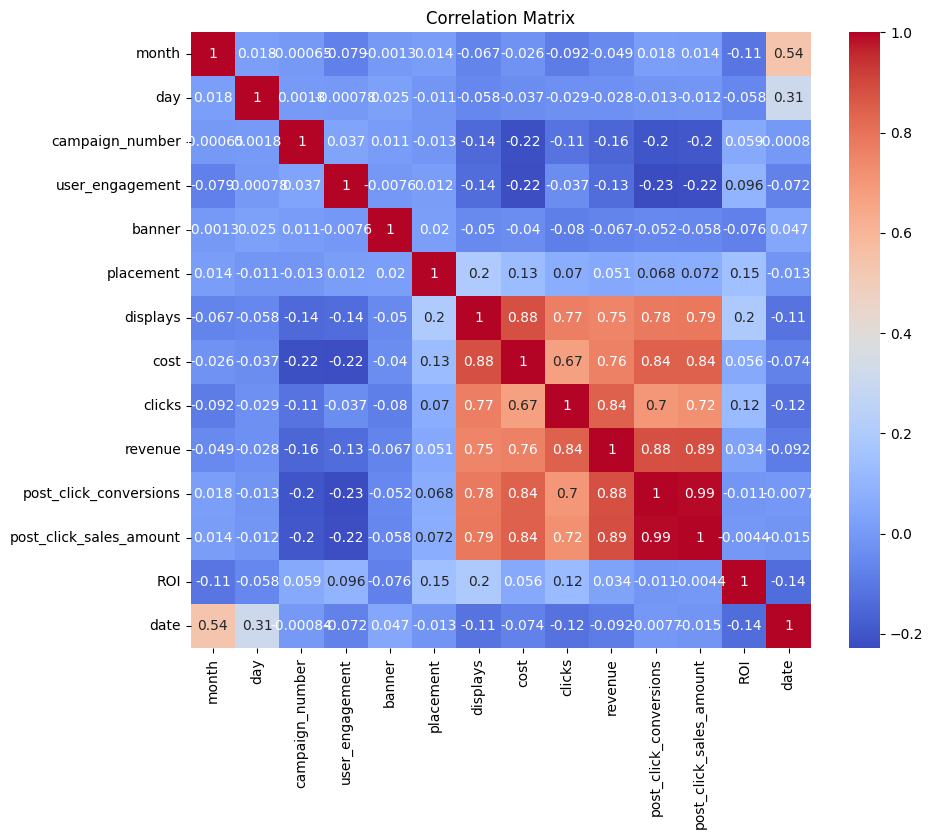

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Feature importance using a tree-based model (RandomForest)

##### Prepare data for modeling

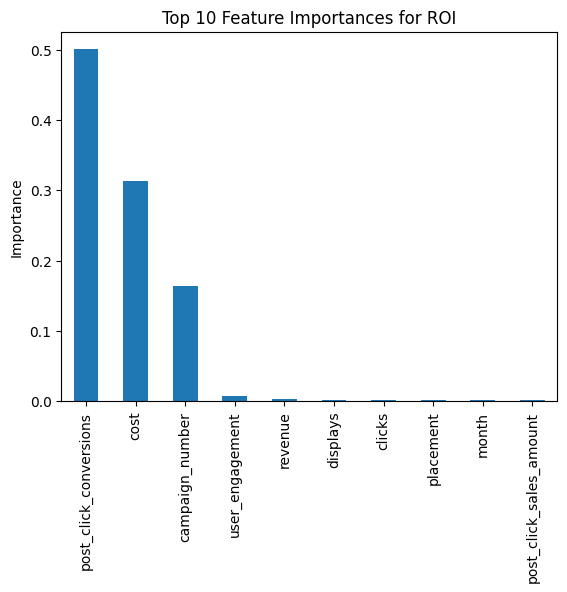

In [56]:
X = df.drop(columns=['ROI', 'date'])
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = df['ROI']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances for ROI')
plt.ylabel('Importance')
plt.show()

##### Dimensionality reduction with PCA

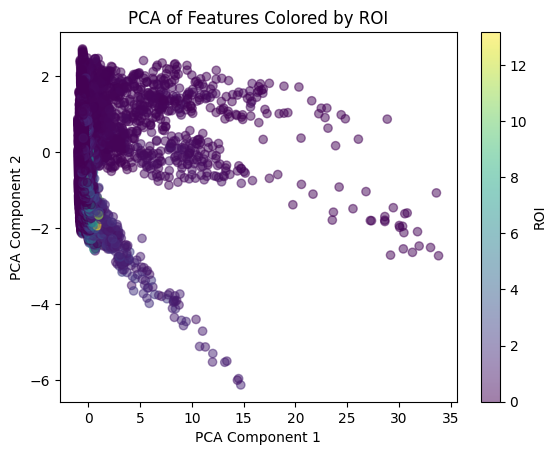

In [57]:
pca = PCA(n_components=2)
X_scaled = sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Features Colored by ROI')
plt.colorbar(label='ROI')
plt.show()

### Inference

#### Based on the analysis above, we can say that
* We can continue using "camp 3" which is the most successful campain ever
* We should engage more with placement "mno" which is giving as the most value for money

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Strategy and ML Model for Marketing Spend Optimization

# 1. Problem Restatement:
# Predict the ROI of marketing campaigns based on campaign features, so the firm can allocate budget to maximize ROI.

# 2. Strategy:
# - Use historical data to train a regression model that predicts ROI for each campaign configuration.
# - Use feature importance to identify key drivers of ROI.
# - Simulate or recommend optimal campaign settings (placement, user_engagement, banner, etc.) for future campaigns.


# 3. Implementation Steps:
# a) Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b) Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# c) Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

# d) Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print("Top 10 Features Driving ROI:")
print(top_features)

# e) Recommendation Example:
# Find the top 5 predicted ROI campaign settings from the test set
X_test_copy = X_test.copy()
X_test_copy['predicted_ROI'] = y_pred
top_campaigns = X_test_copy.sort_values('predicted_ROI', ascending=False).head(5)
print("Top 5 Recommended Campaign Settings (from test set):")
print(top_campaigns)

# The business can use these insights to allocate more budget to campaign settings with high predicted ROI.

Test MSE: 0.0031
Test R^2: 0.9943
Top 10 Features Driving ROI:
post_click_conversions     0.503230
cost                       0.308689
campaign_number            0.161558
user_engagement            0.007830
revenue                    0.005031
clicks                     0.003127
displays                   0.002753
post_click_sales_amount    0.001996
day                        0.001887
placement                  0.001689
dtype: float64
Top 5 Recommended Campaign Settings (from test set):
       month  day  campaign_number  user_engagement  banner  placement  \
12472      1   10                2                2       1          3   
763        0    4                2                0       1          5   
11068      1    1                2                2       1          3   
2449       0   12                2                2       1          3   
2215       0   11                1                2       6          4   

       displays    cost  clicks  revenue  post_click_conversions